<a href="https://colab.research.google.com/github/sindhu-iiitg25/Data-Structures-and-Algorithms/blob/main/Sentiment_Polarity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Polarity Classification**

## **Introduction:**

In this assignment, the task is to build a binary polarity classifier that categorizes movie reviews as either positive or negative.

The dataset used for this task is sourced from Cornell's movie-review data repository, specifically the **Rotten Tomatoes movie review dataset**.

# **Step 1: Data Preparation**




### **1.1 Download and Extract the Dataset**

Using the given link to the dataset, download the dataset and extracting it.

In [1]:
import urllib.request
import tarfile

# Download the data
url = "https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz"
filename = "rt-polaritydata.tar.gz"
urllib.request.urlretrieve(url, filename)

# Extract the tar.gz file
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()
print("Data downloaded and extracted successfully.")

Data downloaded and extracted successfully.


## **1.2 Dataset Analysis**

Analysis of the structure of the data to help understand the distribution of reviews and text length.



In [2]:
# Read positive and negative reviews
with open("rt-polaritydata/rt-polarity.pos", "r", encoding="latin-1") as pos_file:
    pos_reviews = pos_file.readlines()

with open("rt-polaritydata/rt-polarity.neg", "r", encoding="latin-1") as neg_file:
    neg_reviews = neg_file.readlines()

print(f"Review Count")
# Analyze the number of reviews
print(f"Number of positive reviews: {len(pos_reviews)}")
print(f"Number of negative reviews: {len(neg_reviews)}")

# Analyze the average length of reviews (in words)
pos_review_lengths = [len(review.split()) for review in pos_reviews]
neg_review_lengths = [len(review.split()) for review in neg_reviews]

avg_pos_length = sum(pos_review_lengths) / len(pos_review_lengths)
avg_neg_length = sum(neg_review_lengths) / len(neg_review_lengths)

print(f"\nAverage Review Length")
print(f"Average positive review length (in words): {avg_pos_length:.2f}")
print(f"Average negative review length (in words): {avg_neg_length:.2f}")

Review Count
Number of positive reviews: 5331
Number of negative reviews: 5331

Average Review Length
Average positive review length (in words): 21.09
Average negative review length (in words): 20.94


## **1.3 Load and Prepare the Dataset**

Create a DataFrame and load the reviews into it.
Label the Reviews:

*   positive reviews as 1
*   negative reviews as 0



In [3]:
import pandas as pd

# Create a dataframe with reviews and their respective labels
data = pd.DataFrame({
    'review': pos_reviews + neg_reviews,
    'label': [1] * len(pos_reviews) + [0] * len(neg_reviews)  # 1 for positive, 0 for negative
})


## **1.4 Split the Dataset into train, test, validate sets**

Splitting into three subsets:

* Training set: First 4,000 positive and 4,000 negative reviews.   
* Validation set: Next 500 positive and 500 negative reviews.
*  Test set: Final 831 positive and 831 negative reviews.


In [4]:
# Create the training, validation, and test splits
train_pos = data[data['label'] == 1][:4000]
train_neg = data[data['label'] == 0][:4000]

valid_pos = data[data['label'] == 1][4000:4500]
valid_neg = data[data['label'] == 0][4000:4500]

test_pos = data[data['label'] == 1][4500:5331]
test_neg = data[data['label'] == 0][4500:5331]

# Combine positive and negative reviews for each set
train_data = pd.concat([train_pos, train_neg])
valid_data = pd.concat([valid_pos, valid_neg])
test_data = pd.concat([test_pos, test_neg])

# Shuffle each set
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
valid_data = valid_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the sizes of each set
print(f"Training set:")
print(f"Positive: {len(train_pos)}, Negative: {len(train_neg)}")\

print(f"\nValidation set:")
print(f"VPositive: {len(valid_pos)}, Negative: {len(valid_neg)}")

print(f"\nTest set size:")
print(f"Positive: {len(test_pos)}, Negative: {len(test_neg)}")


Training set:
Positive: 4000, Negative: 4000

Validation set:
VPositive: 500, Negative: 500

Test set size:
Positive: 831, Negative: 831


## **1.5 Text Preprocessing**
using TF-IDF Vectorization, converting the reviews into numerical format.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data for each split
X_train = vectorizer.fit_transform(train_data['review']).toarray()
X_valid = vectorizer.transform(valid_data['review']).toarray()
X_test = vectorizer.transform(test_data['review']).toarray()

# Extract labels for each split
y_train = train_data['label'].values
y_valid = valid_data['label'].values
y_test = test_data['label'].values

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_valid.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (8000, 5000)
Validation data shape: (1000, 5000)
Test data shape: (1662, 5000)


# **Step-2: Classifiier Models - Logistic Regression & Multinomial Naive Bayes**

## **2.1 Logistic Regression**

### **2.1.1 Train the model**

In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

### **2.1.2 Validation & Results**

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Validate the model
y_valid_pred = model.predict(X_valid)

# Print validation results
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)

print(f"Validation Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Validation Precision: 0.7859, Recall: 0.7340, F1-Score: 0.7590


###**2.1.3 Testing & Results: Precision, Recall, F1-score**


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate precision, recall, and F1-score for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print(f"Test Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Test Precision: 0.7389, Recall: 0.7425, F1-Score: 0.7407


### **2.1.4 TP, TN, FP, FN**

In [21]:
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN
tn, fp, fn, tp = conf_matrix.ravel()

# Print TP, TN, FP, FN
print(f"True Positives: {tp} \nTrue Negatives: {tn} \nFalse Positives: {fp} \nFalse Negatives: {fn}")

True Positives: 617 
True Negatives: 613 
False Positives: 218 
False Negatives: 214


### **2.1.5 Classification Report**

In [33]:
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report for Logistic Rehression:")
print(classification_report(y_test, y_test_pred))


Classification Report for Logistic Rehression:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       831
           1       0.74      0.74      0.74       831

    accuracy                           0.74      1662
   macro avg       0.74      0.74      0.74      1662
weighted avg       0.74      0.74      0.74      1662



### **2.1.6 Confusion Matrix Visualized**

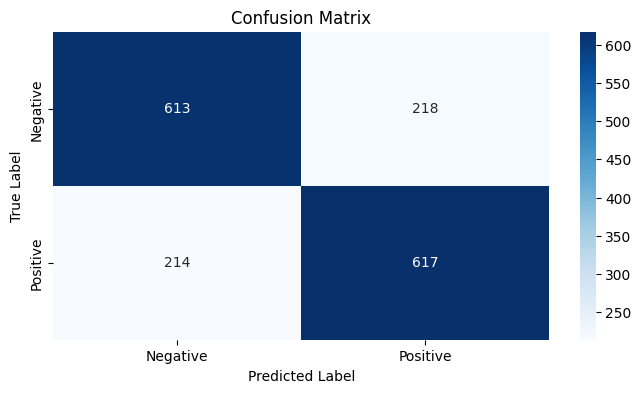

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **2.2 Multinomial Naive Bayes**

### **2.2.1 Train the model**

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

MultinomialNB()

### **2.2.2 Validation & Results**

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Validate the Naive Bayes model
y_valid_pred_nb = nb_model.predict(X_valid)

# Print validation results for Naive Bayes
precision_nb = precision_score(y_valid, y_valid_pred_nb)
recall_nb = recall_score(y_valid, y_valid_pred_nb)
f1_nb = f1_score(y_valid, y_valid_pred_nb)

print(f"Naive Bayes Validation Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1-Score: {f1_nb:.4f}")

Naive Bayes Validation Precision: 0.7856, Recall: 0.7620, F1-Score: 0.7736


### **2.2.3 Testing & Results: Precision, Recall, F1-score**

In [31]:
# Make predictions on the test set
y_test_pred_nb = nb_model.predict(X_test)
# Calculate precision, recall, and F1-score for the test set
precision_nb = precision_score(y_test, y_test_pred_nb)
recall_nb = recall_score(y_test, y_test_pred_nb)
f1_nb = f1_score(y_test, y_test_pred_nb)

# Print the evaluation metrics for the test set
print(f"Test Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1-Score: {f1_nb:.4f}")

Test Precision: 0.7497, Recall: 0.7461, F1-Score: 0.7479


### **2.2.4 TP, TN, FP, FN**

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)

# Extract TP, TN, FP, FN
tn_nb, fp_nb, fn_nb, tp_nb = conf_matrix_nb.ravel()

# Print TP, TN, FP, FN for Naive Bayes
print(f"True Positives: {tp_nb}, \nTrue Negatives: {tn_nb}, \nFalse Positives: {fp_nb}, \nFalse Negatives: {fn_nb}")

True Positives: 620, 
True Negatives: 624, 
False Positives: 207, 
False Negatives: 211


### **2.2.5 Classification Report**

In [29]:
# Print classification report for Naive Bayes
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, y_test_pred_nb))


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       831
           1       0.75      0.75      0.75       831

    accuracy                           0.75      1662
   macro avg       0.75      0.75      0.75      1662
weighted avg       0.75      0.75      0.75      1662



### **2.2.6 Confusion Matrix Visualized**

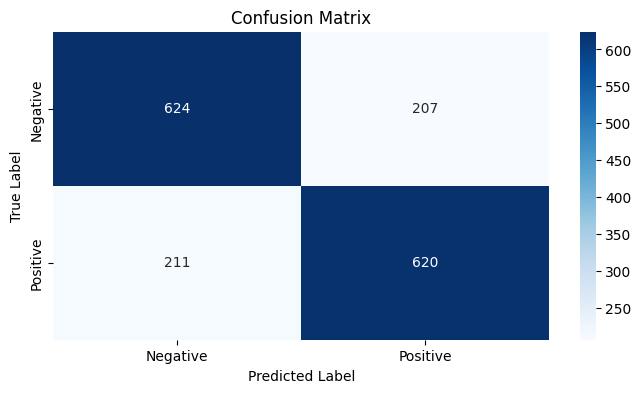

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#**Step-3: Results - Comparision and Conclusions**


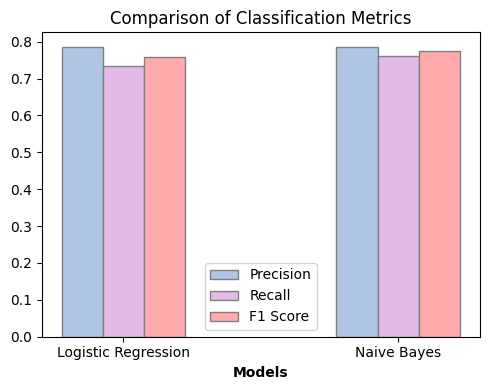

In [47]:
import numpy as np

# Data for visualization
models = ['Logistic Regression', 'Naive Bayes']
precision_scores = [precision, precision_nb]
recall_scores = [recall, recall_nb]
f1_scores = [f1, f1_nb]

# Set width of bar
bar_width = 0.15
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
plt.figure(figsize=(5, 4))
plt.bar(r1, precision_scores, color='#AEC6E4', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='#E3B9E6', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='#FFABAB', width=bar_width, edgecolor='grey', label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Create legend & Show graphic
plt.title('Comparison of Classification Metrics')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()